# Consolidación de datos

In [9]:
def getInputPath():
      return 'Inputs/'

In [10]:
def getOutputPath():
       return 'Outputs/'

In [3]:
import pandas as pd

## Transporte

In [11]:
datos_airbnb = pd.read_csv(getInputPath() + "airbnb_clean.csv")
datos_transporte =  pd.read_csv(getInputPath() + "transporte_agregado.csv")

In [ ]:
datos_airbnb = datos_airbnb.rename(columns={'neighbourhood_cleansed_index': 'Barrio'})
datos_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18045 entries, 0 to 18044
Columns: 197 entries, Unnamed: 0 to amenities_Doorman
dtypes: float64(15), int64(159), object(23)
memory usage: 27.1+ MB


In [ ]:
datos_airbnb.head()

,Unnamed: 0,d_last_scraped,s_name,s_summary,s_space,s_description,s_neighborhood_overview,s_notes,s_transit,s_access,...,amenities_Fire_extinguisher,amenities_Heating,amenities_Refrigerator,amenities_Free_street_parking,amenities_Private_bathroom,amenities_Pocket_wifi,amenities_BBQ_grill,amenities_Keypad,amenities_Single_level_home,amenities_Doorman
0,0,2018-09-11,"PLAZA MAYOR (wifi, air conditioning)",Cosy small studio with a nice balcony close to...,THE PLACE: This small studio is located on the...,Cosy small studio with a nice balcony close to...,The studio is located in the city center at a ...,Late check in: please be aware that the person...,"Sol, Latina and Tirso de Molina metro stations...",NaN,...,0,1,0,0,0,0,0,0,0,0
1,1,2018-09-11,Bright and airy room,We have a quiet and sunny room with a good vie...,I am living in a nice flat near the centre of ...,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,We are a 15 min bus ride away from the Casa de...,The flat is near the centre of Madrid (15 minu...,There is fibre optic internet connection for y...,...,1,1,1,0,0,1,0,0,0,1
2,2,2018-09-11,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...",LOCATION. Brand new flats near the Atlantic H...,"Studio located 50 meters from Gran Via, next t...","The area is next to the Gran Via, so people li...",Just enjoy your trip.,To go from the airport you have several differ...,Apartment with elevator has a storage room for...,...,1,1,1,0,0,0,0,0,0,0
3,3,2018-09-11,"Select the Madrid more ""cool"".",Apartamento céntrico junto a Gran Vía (VT-296)...,"Select the Madrid more ""cool"" : 70 m, 2 bedroo...","Select the Madrid more ""cool"" : 70 m, 2 bedroo...","Cosmopolita, lleno de locales de moda, restaur...",Al estar en el distrito Centro (Barrio de Just...,La situación del apartamento hace accesibles a...,La disponibilidad de acceso al apartamento es ...,...,0,1,0,0,0,0,0,0,0,0
4,4,2018-09-11,Roon for two people,NaN,Room for two person with dressing room and bat...,Room for two person with dressing room and bat...,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
datos_transporte.head()

,Unnamed: 0,Distrito_Nombre,Distrito,Barrio_Nombre,Barrio,Autobus,Metro
0,0,Arganzuela,2.0,Acacias,22.0,35.0,2.0
1,1,Arganzuela,2.0,Atocha,27.0,24.0,2.0
2,2,Arganzuela,2.0,Chopera,23.0,21.0,1.0
3,3,Arganzuela,2.0,Delicias,25.0,22.0,1.0
4,4,Arganzuela,2.0,Imperial,21.0,34.0,NaN


In [ ]:
datos_transporte.loc[:,'Barrio'] = datos_transporte.Barrio.astype('int64')

In [ ]:
datos_transporte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 7 columns):
Unnamed: 0         131 non-null int64
Distrito_Nombre    131 non-null object
Distrito           131 non-null float64
Barrio_Nombre      131 non-null object
Barrio             131 non-null int64
Autobus            131 non-null float64
Metro              100 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 7.2+ KB


In [ ]:
datos_consolidados = pd.merge(datos_transporte, datos_airbnb, how='inner', on='Barrio').drop(
    columns=['Distrito_Nombre','Distrito', 'Barrio_Nombre','Unnamed: 0_y', 'Unnamed: 0_x'], axis=1).rename(
    columns={
    'neighbourhood_group_cleansed': 'Distrito_Nombre',
    'neighbourhood_group_cleansed_index': 'Distrito',
    'neighbourhood_cleansed': 'Barrio_Nombre',
    'Autobus': 'Paradas_Autobus',
    'Metro': 'Paradas_Metro'
})

In [ ]:
datos_consolidados.head()

,Barrio,Paradas_Autobus,Paradas_Metro,d_last_scraped,s_name,s_summary,s_space,s_description,s_neighborhood_overview,s_notes,...,amenities_Fire_extinguisher,amenities_Heating,amenities_Refrigerator,amenities_Free_street_parking,amenities_Private_bathroom,amenities_Pocket_wifi,amenities_BBQ_grill,amenities_Keypad,amenities_Single_level_home,amenities_Doorman
0,22,35.0,2.0,2018-09-11,Host family in the center of Madrid,NaN,I am Margarita and i am 57 years old. I speak...,I am Margarita and i am 57 years old. I speak...,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
1,22,35.0,2.0,2018-09-11,DUPLEX AT MADRID CENTER WITH POOL,"Nuestra casa es un bonito y soleado duplex,equ...","Hello, We rent our house which is located in a...","Hello, We rent our house which is located in a...",NaN,NaN,...,0,1,0,0,0,0,0,0,0,1
2,22,35.0,2.0,2018-09-11,"WIFI B&B , BATH, TWO BEDS, CENTER, AWESOME.",BEDROOM JUST FOR YOU AND YOUR PARTNER OR FRIEN...,GREAT VALUE FOR MONEY I am specialized in host...,BEDROOM JUST FOR YOU AND YOUR PARTNER OR FRIEN...,My flat has an excellent communication with an...,Excellent relation Quality/Price. My house is ...,...,0,1,0,0,0,0,0,0,0,0
3,22,35.0,2.0,2018-09-11,Host family in the center of Madrid,NaN,I am Margarita and i am 57 years old. I speak...,I am Margarita and i am 57 years old. I speak...,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
4,22,35.0,2.0,2018-09-11,Embajadores/10 min Atocha y Latina,"Apartamento amplio, 70m2, totalmente renovado....",Apartment with two bedrooms next to Embajadore...,Apartment with two bedrooms next to Embajadore...,NaN,Gracias por tu interés! Para mi es muy importa...,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
datos_consolidados.loc[datos_consolidados.Paradas_Metro.isna(), 'Paradas_Metro'] = 0
datos_consolidados.loc[datos_consolidados.Paradas_Autobus.isna(), 'Paradas_Autobus'] = 0
datos_consolidados.head()

,Barrio,Paradas_Autobus,Paradas_Metro,d_last_scraped,s_name,s_summary,s_space,s_description,s_neighborhood_overview,s_notes,...,amenities_Fire_extinguisher,amenities_Heating,amenities_Refrigerator,amenities_Free_street_parking,amenities_Private_bathroom,amenities_Pocket_wifi,amenities_BBQ_grill,amenities_Keypad,amenities_Single_level_home,amenities_Doorman
0,22,35.0,2.0,2018-09-11,Host family in the center of Madrid,NaN,I am Margarita and i am 57 years old. I speak...,I am Margarita and i am 57 years old. I speak...,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
1,22,35.0,2.0,2018-09-11,DUPLEX AT MADRID CENTER WITH POOL,"Nuestra casa es un bonito y soleado duplex,equ...","Hello, We rent our house which is located in a...","Hello, We rent our house which is located in a...",NaN,NaN,...,0,1,0,0,0,0,0,0,0,1
2,22,35.0,2.0,2018-09-11,"WIFI B&B , BATH, TWO BEDS, CENTER, AWESOME.",BEDROOM JUST FOR YOU AND YOUR PARTNER OR FRIEN...,GREAT VALUE FOR MONEY I am specialized in host...,BEDROOM JUST FOR YOU AND YOUR PARTNER OR FRIEN...,My flat has an excellent communication with an...,Excellent relation Quality/Price. My house is ...,...,0,1,0,0,0,0,0,0,0,0
3,22,35.0,2.0,2018-09-11,Host family in the center of Madrid,NaN,I am Margarita and i am 57 years old. I speak...,I am Margarita and i am 57 years old. I speak...,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
4,22,35.0,2.0,2018-09-11,Embajadores/10 min Atocha y Latina,"Apartamento amplio, 70m2, totalmente renovado....",Apartment with two bedrooms next to Embajadore...,Apartment with two bedrooms next to Embajadore...,NaN,Gracias por tu interés! Para mi es muy importa...,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
corr = datos_consolidados.corr()
for column in corr.columns:
  for index in corr.index:
    if index != column and corr.loc[index, column] >= 0.95:
      print(index,' - ', column, ': ', corr.loc[index, column])

Distrito  -  Barrio :  0.9993494367048854
host_total_listings_count  -  host_listings_count :  1.0
host_listings_count  -  host_total_listings_count :  1.0
weekly_price  -  price :  0.987456812925296
monthly_price  -  price :  0.9760580448020266
price  -  weekly_price :  0.987456812925296
monthly_price  -  weekly_price :  0.9888867376341944
price  -  monthly_price :  0.9760580448020266
weekly_price  -  monthly_price :  0.9888867376341944
availability_90  -  availability_60 :  0.9610103985807806
availability_60  -  availability_90 :  0.9610103985807806
host_verification_sesame  -  host_verification_sesame_offline :  1.0
host_verification_jumio  -  host_verification_government_id :  0.9603191482340472
host_verification_identity_manual  -  host_verification_selfie :  0.9788572916161183
host_verification_selfie  -  host_verification_identity_manual :  0.9788572916161183
host_verification_government_id  -  host_verification_jumio :  0.9603191482340472
host_verification_sesame_offline  -  ho

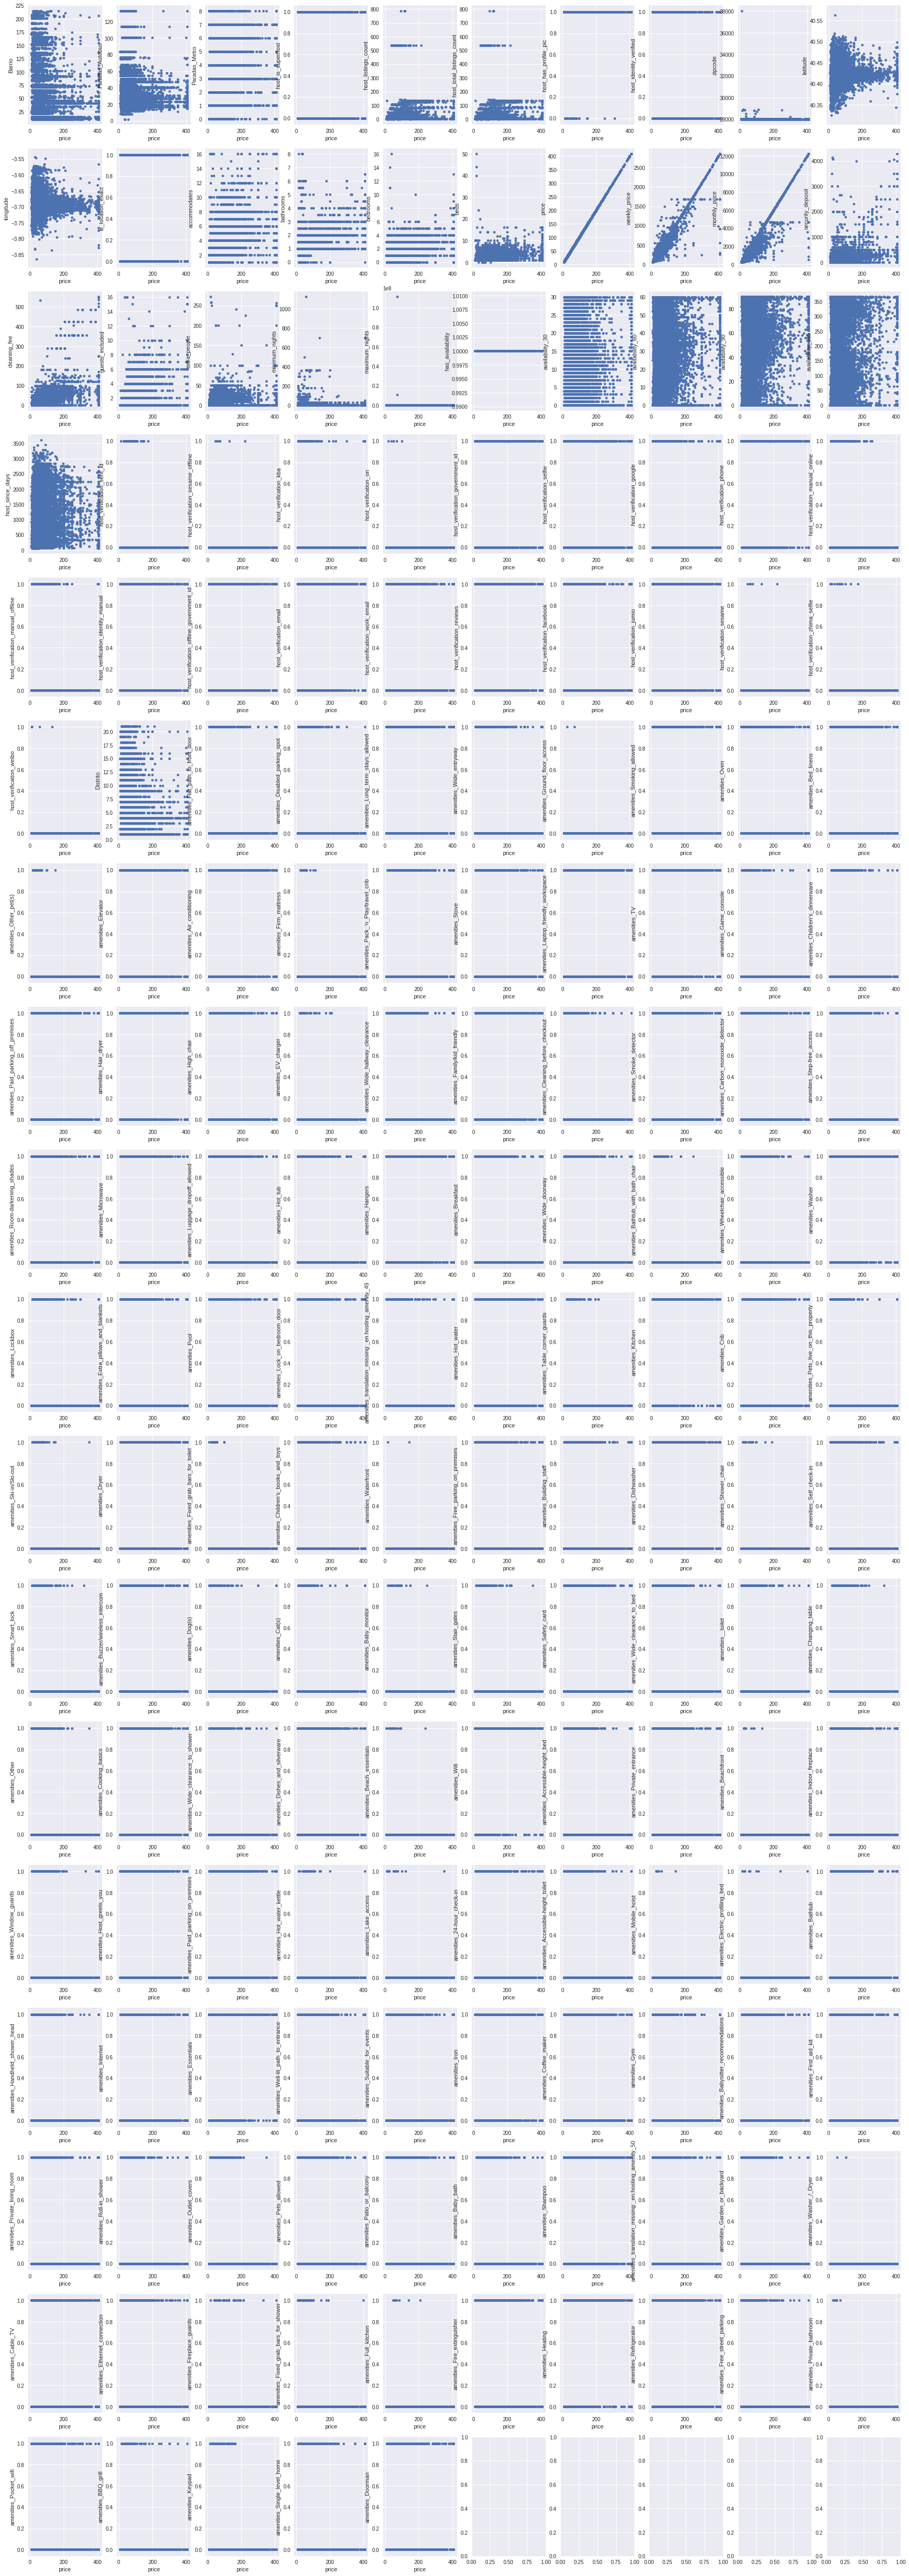

In [ ]:
import matplotlib.pyplot as plt # para dibujar
from pandas.api.types import is_numeric_dtype

%matplotlib inline

j=0
fig, axes = plt.subplots(18,10,figsize=(30, 90))

axes = axes.reshape(-1)
for column in datos_consolidados.columns:
  if is_numeric_dtype(datos_consolidados[column]):
    datos_consolidados.plot.scatter('price', column, ax=axes[j])
    j = j + 1
plt.show()

## Intervenciones de la policía municipal


In [ ]:
datos_consolidados.columns

Index(['Barrio', 'Paradas_Autobus', 'Paradas_Metro', 'd_last_scraped',
       's_name', 's_summary', 's_space', 's_description',
       's_neighborhood_overview', 's_notes',
       ...
       'amenities_Fire_extinguisher', 'amenities_Heating',
       'amenities_Refrigerator', 'amenities_Free_street_parking',
       'amenities_Private_bathroom', 'amenities_Pocket_wifi',
       'amenities_BBQ_grill', 'amenities_Keypad',
       'amenities_Single_level_home', 'amenities_Doorman'],
      dtype='object', length=198)

In [ ]:
ipolicia = pd.read_csv(getInputPath() + 'IntervencionesPMun-unix-utf8.csv', sep=";")

In [ ]:
ipolicia.head()

,Barrio,Anyo,Intervenciones
0,Ciudad de Madrid,2006,10205
1,Centro,2006,2385
2,Arganzuela,2006,486
3,Retiro,2006,708
4,Salamanca,2006,403


In [ ]:
ipolicia.Anyo.unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [ ]:
ipolicia_2016 = ipolicia.loc[ipolicia.Anyo == 2016]

In [ ]:
ipolicia_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 230 to 252
Data columns (total 3 columns):
Barrio            23 non-null object
Anyo              23 non-null int64
Intervenciones    23 non-null int64
dtypes: int64(2), object(1)
memory usage: 736.0+ bytes


In [ ]:
datos_consolidados.Distrito_Nombre.unique()

array(['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín',
       'Chamberí', 'Ciudad Lineal', 'Fuencarral - El Pardo', 'Hortaleza',
       'Latina', 'Moncloa - Aravaca', 'Moratalaz', 'Puente de Vallecas',
       'Retiro', 'Salamanca', 'San Blas - Canillejas', 'Tetuán', 'Usera',
       'Vicálvaro', 'Villa de Vallecas', 'Villaverde'], dtype=object)

In [ ]:
for distrito in ipolicia.Barrio.unique():
  if distrito in datos_consolidados.Distrito_Nombre.unique():
    print(distrito, 'SI')
  else:
    print(distrito, 'NO')

Ciudad de Madrid NO
Centro SI
Arganzuela SI
Retiro SI
Salamanca SI
Chamartín SI
Tetuán SI
Chamberí SI
Fuencarral-El Pardo NO
Moncloa-Aravaca NO
Latina SI
Carabanchel SI
Usera SI
Puente de Vallecas SI
Moratalaz SI
Ciudad Lineal SI
Hortaleza SI
Villaverde SI
Villa de Vallecas SI
Vicálvaro SI
San Blas/Canillejas NO
Barajas SI
Otras zonas NO


In [ ]:
ipolicia_2016.loc[ipolicia_2016.Barrio == 'Fuencarral-El Pardo','Barrio'] = 'Fuencarral - El Pardo'
ipolicia_2016.loc[ipolicia_2016.Barrio == 'Moncloa-Aravaca','Barrio'] = 'Moncloa - Aravaca'
ipolicia_2016.loc[ipolicia_2016.Barrio == 'San Blas/Canillejas','Barrio'] = 'San Blas - Canillejas'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [ ]:
for distrito in ipolicia_2016.Barrio.unique():
  if distrito in datos_consolidados.Distrito_Nombre.unique():
    print(distrito, 'SI')
  else:
    print(distrito, 'NO')

Ciudad de Madrid NO
Centro SI
Arganzuela SI
Retiro SI
Salamanca SI
Chamartín SI
Tetuán SI
Chamberí SI
Fuencarral - El Pardo SI
Moncloa - Aravaca SI
Latina SI
Carabanchel SI
Usera SI
Puente de Vallecas SI
Moratalaz SI
Ciudad Lineal SI
Hortaleza SI
Villaverde SI
Villa de Vallecas SI
Vicálvaro SI
San Blas - Canillejas SI
Barajas SI
Otras zonas NO


In [ ]:
datos_consolidados = pd.merge(datos_consolidados, ipolicia_2016, how='left', left_on='Distrito_Nombre',right_on='Barrio').drop(['Barrio_y'], axis=1).rename(columns={'Barrio_x': 'Barrio'})
datos_consolidados.head()

,Barrio,Paradas_Autobus,Paradas_Metro,d_last_scraped,s_name,s_summary,s_space,s_description,s_neighborhood_overview,s_notes,...,amenities_Refrigerator,amenities_Free_street_parking,amenities_Private_bathroom,amenities_Pocket_wifi,amenities_BBQ_grill,amenities_Keypad,amenities_Single_level_home,amenities_Doorman,Anyo,Intervenciones
0,22,35.0,2.0,2018-09-11,Host family in the center of Madrid,NaN,I am Margarita and i am 57 years old. I speak...,I am Margarita and i am 57 years old. I speak...,NaN,NaN,...,0,0,0,0,0,0,0,0,2016,672
1,22,35.0,2.0,2018-09-11,DUPLEX AT MADRID CENTER WITH POOL,"Nuestra casa es un bonito y soleado duplex,equ...","Hello, We rent our house which is located in a...","Hello, We rent our house which is located in a...",NaN,NaN,...,0,0,0,0,0,0,0,1,2016,672
2,22,35.0,2.0,2018-09-11,"WIFI B&B , BATH, TWO BEDS, CENTER, AWESOME.",BEDROOM JUST FOR YOU AND YOUR PARTNER OR FRIEN...,GREAT VALUE FOR MONEY I am specialized in host...,BEDROOM JUST FOR YOU AND YOUR PARTNER OR FRIEN...,My flat has an excellent communication with an...,Excellent relation Quality/Price. My house is ...,...,0,0,0,0,0,0,0,0,2016,672
3,22,35.0,2.0,2018-09-11,Host family in the center of Madrid,NaN,I am Margarita and i am 57 years old. I speak...,I am Margarita and i am 57 years old. I speak...,NaN,NaN,...,0,0,0,0,0,0,0,0,2016,672
4,22,35.0,2.0,2018-09-11,Embajadores/10 min Atocha y Latina,"Apartamento amplio, 70m2, totalmente renovado....",Apartment with two bedrooms next to Embajadore...,Apartment with two bedrooms next to Embajadore...,NaN,Gracias por tu interés! Para mi es muy importa...,...,0,0,0,0,0,0,0,0,2016,672


## Evolución precios alquiler

In [ ]:
precios_alquiler = pd.read_csv(getInputPath() + 'EvolucionPreciosAlquiler_2.csv', sep=";")

In [ ]:
precios_alquiler.head()

,Barrio,Anyo,Trimestre,Precio
0,Ciudad de Madrid,2010,T1,12.01
1,Ciudad de Madrid,2010,T2,12.01
2,Ciudad de Madrid,2010,T3,11.86
3,Ciudad de Madrid,2010,T4,11.95
4,Ciudad de Madrid,2011,T1,11.97


In [ ]:
precios_alquiler.Anyo.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [ ]:
precios_alquiler_2017 = precios_alquiler.loc[precios_alquiler.Anyo == 2017, :].loc[precios_alquiler.Trimestre == 'T4',:]

In [ ]:
precios_alquiler_2017.loc[precios_alquiler_2017.Precio == '-','Precio'] = 0

In [ ]:
precios_alquiler_2017.loc[:,'Precio'] = precios_alquiler_2017.Precio.astype('float')

In [ ]:
datos_consolidados.Distrito_Nombre.unique()

array(['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín',
       'Chamberí', 'Ciudad Lineal', 'Fuencarral - El Pardo', 'Hortaleza',
       'Latina', 'Moncloa - Aravaca', 'Moratalaz', 'Puente de Vallecas',
       'Retiro', 'Salamanca', 'San Blas - Canillejas', 'Tetuán', 'Usera',
       'Vicálvaro', 'Villa de Vallecas', 'Villaverde'], dtype=object)

In [ ]:
for distrito in precios_alquiler_2017.Barrio.unique():
  if distrito in datos_consolidados.Distrito_Nombre.unique():
    print(distrito, 'SI')
  else:
    print(distrito, 'NO')

Ciudad de Madrid NO
Centro SI
Arganzuela SI
Retiro SI
Salamanca SI
Chamartín SI
Tetuán SI
Chamberí SI
Fuencarral-El Pardo NO
Moncloa-Aravaca NO
Latina SI
Carabanchel SI
Usera SI
Puente de Vallecas SI
Moratalaz SI
Ciudad Lineal SI
Hortaleza SI
Villaverde SI
Villa de Vallecas SI
Vicálvaro SI
San Blas-Canillejas NO
Barajas SI


In [ ]:
precios_alquiler_2017.loc[precios_alquiler_2017.Barrio == 'Fuencarral-El Pardo','Barrio'] = 'Fuencarral - El Pardo'
precios_alquiler_2017.loc[precios_alquiler_2017.Barrio == 'Moncloa-Aravaca','Barrio'] = 'Moncloa - Aravaca'
precios_alquiler_2017.loc[precios_alquiler_2017.Barrio == 'San Blas-Canillejas','Barrio'] = 'San Blas - Canillejas'

In [ ]:
for distrito in precios_alquiler_2017.Barrio.unique():
  if distrito in datos_consolidados.Distrito_Nombre.unique():
    print(distrito, 'SI')
  else:
    print(distrito, 'NO')

Ciudad de Madrid NO
Centro SI
Arganzuela SI
Retiro SI
Salamanca SI
Chamartín SI
Tetuán SI
Chamberí SI
Fuencarral - El Pardo SI
Moncloa - Aravaca SI
Latina SI
Carabanchel SI
Usera SI
Puente de Vallecas SI
Moratalaz SI
Ciudad Lineal SI
Hortaleza SI
Villaverde SI
Villa de Vallecas SI
Vicálvaro SI
San Blas - Canillejas SI
Barajas SI


In [ ]:
datos_consolidados = pd.merge(datos_consolidados, precios_alquiler_2017, how='left', left_on='Distrito_Nombre',right_on='Barrio').drop(['Barrio_y', 'Anyo_x', 'Anyo_y', 'Trimestre'], axis=1).rename(
    columns={'Barrio_x': 'Barrio',
            'Precio': 'Precio_Alquiler'})
datos_consolidados.tail()

,Barrio,Paradas_Autobus,Paradas_Metro,d_last_scraped,s_name,s_summary,s_space,s_description,s_neighborhood_overview,s_notes,...,amenities_Refrigerator,amenities_Free_street_parking,amenities_Private_bathroom,amenities_Pocket_wifi,amenities_BBQ_grill,amenities_Keypad,amenities_Single_level_home,amenities_Doorman,Intervenciones,Precio_Alquiler
18040,171,75.0,2.0,2018-09-11,"Villaverde Alto, 250€ monthly, expenses included","IN ENGLISH Y ESPAÑOL Hello, I am the owner 💁🏼...",Rent room 🛏 individual inside of 9m2 to boys 👫...,"IN ENGLISH Y ESPAÑOL Hello, I am the owner 💁🏼...",The apartment🏢 is quiet and its street too. It...,Other prices: 💶 € per week 📆 and €250 per mont...,...,1,1,0,0,0,0,0,0,503,10.3
18041,171,75.0,2.0,2018-09-11,"Amplia Habitacion en madrid, 15 min plaza del ...",Habitacion super amplia ideal para dos persona...,"El alojamiento es amplio y bastante comodo , i...",Habitacion super amplia ideal para dos persona...,NaN,"SE INCLUYE toallas , ropa de cama , gel y sham...",...,0,1,0,0,0,0,0,0,503,10.3
18042,171,75.0,2.0,2018-09-11,Piso confortable en Villaverde,"Piso confortable, muy luminoso con amplio saló...",Destaca la luz tan bonita que tiene al tener u...,"Piso confortable, muy luminoso con amplio saló...",El barrio es totalmente tranquilo ya que corre...,NaN,...,0,0,0,0,0,0,0,0,503,10.3
18043,171,75.0,2.0,2018-09-11,PEACEFUL GARDEN,"Habitación individual, luminosa y muy tranquil...",Luminosa habitación individual y muy tranquila...,"Habitación individual, luminosa y muy tranquil...","Barrio tranquilo, con pequeñas tiendas, bares,...",NaN,...,0,0,0,0,0,0,0,0,503,10.3
18044,171,75.0,2.0,2018-09-11,Villaverde alto,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,503,10.3


## Guardar datos iniciales

In [ ]:
datos_consolidados.to_csv(path_or_buf=getOutputPath() + 'consolidados.csv', sep=",")

In [ ]:
datos_airbnb_consolidados = pd.read_csv(getOutputPath() + "consolidados.csv")

In [ ]:
datos_airbnb_consolidados.info(verbose=True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18045 entries, 0 to 18044
Data columns (total 201 columns):
Unnamed: 0                                              18045 non-null int64
Barrio                                                  18045 non-null int64
Paradas_Autobus                                         18045 non-null float64
Paradas_Metro                                           18045 non-null float64
d_last_scraped                                          18045 non-null object
s_name                                                  18039 non-null object
s_summary                                               17354 non-null object
s_space                                                 13029 non-null object
s_description                                           17800 non-null object
s_neighborhood_overview                                 11587 non-null object
s_notes                                                 7880 non-null object
s_transit                        

In [ ]:
corr = datos_airbnb_consolidados.corr()
for column in corr.columns:
  for index in corr.index:
    if index != column and corr.loc[index, column] >= 0.95:
      print(index,' - ', column, ': ', corr.loc[index, column])

Distrito  -  Barrio :  0.9993494367048854
host_total_listings_count  -  host_listings_count :  1.0
host_listings_count  -  host_total_listings_count :  1.0
weekly_price  -  price :  0.987456812925296
monthly_price  -  price :  0.9760580448020266
price  -  weekly_price :  0.987456812925296
monthly_price  -  weekly_price :  0.9888867376341944
price  -  monthly_price :  0.9760580448020266
weekly_price  -  monthly_price :  0.9888867376341944
availability_90  -  availability_60 :  0.9610103985807806
availability_60  -  availability_90 :  0.9610103985807806
host_verification_sesame  -  host_verification_sesame_offline :  1.0
host_verification_jumio  -  host_verification_government_id :  0.9603191482340472
host_verification_identity_manual  -  host_verification_selfie :  0.9788572916161183
host_verification_selfie  -  host_verification_identity_manual :  0.9788572916161183
host_verification_government_id  -  host_verification_jumio :  0.9603191482340472
host_verification_sesame_offline  -  ho

Voy a eliminar las columnas con correlación 1


In [ ]:
 datos_airbnb_consolidados = datos_airbnb_consolidados.drop(['host_total_listings_count', 'host_verification_sesame_offline', 'amenities_Wide_clearance_to_shower'], axis = 1)

Eliminaré también los precios por semana y mensuales y el Distrito

In [ ]:
datos_airbnb_consolidados = datos_airbnb_consolidados.drop(['weekly_price', 'monthly_price', 'Distrito'], axis = 1)

Además voy a eliminar las columnas de texto y de fecha

In [ ]:
for column in datos_airbnb_consolidados.columns:
  if column[0:2] == 'd_' or  column[0:2] == 's_':
    datos_airbnb_consolidados = datos_airbnb_consolidados.drop([column], axis=1)

In [ ]:
datos_airbnb_consolidados = datos_airbnb_consolidados.drop(['Barrio_Nombre', 'Distrito_Nombre', 'Unnamed: 0'], axis = 1)

In [ ]:
datos_airbnb_consolidados.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18045 entries, 0 to 18044
Data columns (total 176 columns):
Barrio                                                  18045 non-null int64
Paradas_Autobus                                         18045 non-null float64
Paradas_Metro                                           18045 non-null float64
host_response_time                                      15205 non-null object
host_is_superhost                                       18045 non-null int64
host_listings_count                                     18040 non-null float64
host_has_profile_pic                                    18045 non-null int64
host_identity_verified                                  18045 non-null int64
zipcode                                                 18045 non-null float64
latitude                                                18045 non-null float64
longitude                                               18045 non-null float64
is_location_exact             

In [ ]:
property_dummies = pd.get_dummies(datos_airbnb_consolidados.property_type, prefix='property_type', prefix_sep='_').astype('int64')
bed_dummies = pd.get_dummies(datos_airbnb_consolidados.bed_type, prefix='bed_type', prefix_sep='_').astype('int64')
room_dummies = pd.get_dummies(datos_airbnb_consolidados.room_type, prefix='room_type', prefix_sep='_').astype('int64')
datos_airbnb_consolidados = pd.concat([datos_airbnb_consolidados, property_dummies, bed_dummies, room_dummies], axis = 1)
datos_airbnb_consolidados = datos_airbnb_consolidados.drop(['property_type', 'bed_type', 'room_type'], axis=1)


In [ ]:
datos_airbnb_consolidados.host_response_time.value_counts()

within an hour        11050
within a few hours     2295
within a day           1565
a few days or more      295
Name: host_response_time, dtype: int64

In [ ]:
ctype = CategoricalDtype(categories=["within an hour", "within a few hours", "within a day", "a few days or more"],ordered=True)
datos_airbnb_consolidados.loc[:, 'host_response_time'] = datos_airbnb_consolidados.host_response_time.astype(ctype)

In [ ]:
datos_airbnb_consolidados.cancellation_policy.value_counts()

strict_14_with_grace_period    6478
moderate                       5797
flexible                       5639
super_strict_30                 119
super_strict_60                  12
Name: cancellation_policy, dtype: int64

In [ ]:
ctype = CategoricalDtype(categories=["flexible", "moderate", "strict_14_with_grace_period", "super_strict_30", "super_strict_60"],ordered=True)
datos_airbnb_consolidados.loc[:, 'cancellation_policy'] = datos_airbnb_consolidados.cancellation_policy.astype(ctype)

In [ ]:

datos_airbnb_consolidados =pd.concat(
    [datos_airbnb_consolidados, datos_airbnb_consolidados.cancellation_policy.cat.codes, datos_airbnb_consolidados.host_response_time.cat.codes], axis = 1).drop(
    ['cancellation_policy', 'host_response_time'], axis = 1).rename(
    columns={1:'host_response_time',
            0:'cancellation_policy'})

In [ ]:
for column in datos_airbnb_consolidados.columns:
  datos_airbnb_consolidados.loc[datos_airbnb_consolidados[column].isna(), column] = datos_airbnb_consolidados[column].mean()

## Guardar datos

In [ ]:
datos_airbnb_consolidados.to_csv(path_or_buf=getOutputPath() + 'consolidados_ml.csv', sep=",")